<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [ ]:
# Download the dataset
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true

# Unzip the file
!unzip SpamEmailClassificationDataset.zip

--2025-09-13 07:07:29--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2025-09-13 07:07:29--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2025-09-13 07:07:29--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip
Res

### Step 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Step 3

In [ ]:
# Read the data - note the correct path with subdirectory
df = pd.read_csv('./SpamEmailClassificationDataset/combined_data.csv')

# Display basic info
print(f"Total records in dataset: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

# Check for null values
print(f"\nNull values:\n{df.isnull().sum()}")

Total records in dataset: 14861
Columns: ['label', 'text']

First 5 rows:
   label                                               text
0  label                                               text
1      1  ounce feather bowl hummingbird opec moment ala...
2      1  wulvob get your medircations online qnb ikud v...
3      0   computer connection from cnn com wednesday es...
4      1  university degree obtain a prosperous future m...

Null values:
label    0
text     0
dtype: int64


### Step 4

In [ ]:
# Check the current state
print("Available columns:", df.columns.tolist())
print("First few rows of original data:")
print(df.head())
print("\nUnique values in label column:", df['label'].unique())

# Fix the label column - remove rows where label is 'label' (header row mixed in data)
df = df[df['label'] != 'label']

# Convert label to numeric
df['label'] = df['label'].astype(int)

print("\nAfter cleaning:")
print(f"Unique values in label column: {df['label'].unique()}")
print(f"Value counts:\n{df['label'].value_counts()}")

# Sample 3000 records from each class for balanced dataset
n_samples = 3000

# Get spam and ham samples
spam_samples = df[df['label'] == 1].sample(n=min(n_samples, len(df[df['label'] == 1])), random_state=42)
ham_samples = df[df['label'] == 0].sample(n=min(n_samples, len(df[df['label'] == 0])), random_state=42)

# Combine and shuffle
df_balanced = pd.concat([spam_samples, ham_samples]).sample(frac=1, random_state=42).reset_index(drop=True)

# Use the balanced dataset
df = df_balanced

print(f"\nNew dataset size: {len(df)}")
print(f"Label distribution:\n{df['label'].value_counts()}")

Available columns: ['label', 'text']
First few rows of original data:
   label                                               text
0  label                                               text
1      1  ounce feather bowl hummingbird opec moment ala...
2      1  wulvob get your medircations online qnb ikud v...
3      0   computer connection from cnn com wednesday es...
4      1  university degree obtain a prosperous future m...

Unique values in label column: ['label' '1' '0']

After cleaning:
Unique values in label column: [1 0]
Value counts:
label
1    7813
0    7047
Name: count, dtype: int64

New dataset size: 6000
Label distribution:
label
1    3000
0    3000
Name: count, dtype: int64


### Step 5

Plotting distribution for 6000 messages


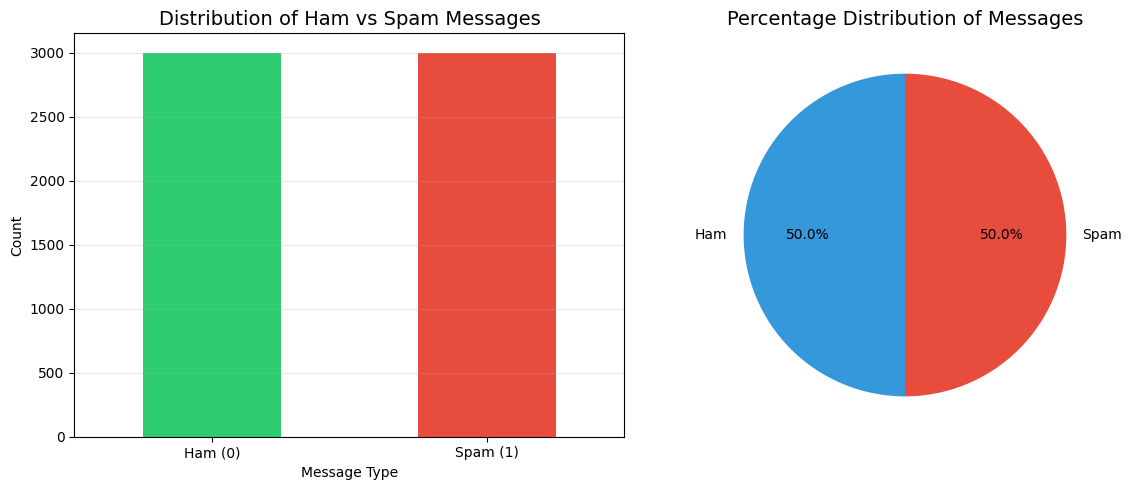

In [ ]:
# Check if we have data to plot
if len(df) == 0:
    print("DataFrame is empty! Please check the data loading step.")
else:
    print(f"Plotting distribution for {len(df)} messages")

    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Get value counts
    label_counts = df['label'].value_counts().sort_index()

    # Histogram
    label_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
    ax1.set_title('Distribution of Ham vs Spam Messages', fontsize=14)
    ax1.set_xlabel('Message Type')
    ax1.set_ylabel('Count')
    ax1.set_xticklabels(['Ham (0)', 'Spam (1)'], rotation=0)
    ax1.grid(axis='y', alpha=0.3)

    # Pie Chart
    colors = ['#3498db', '#e74c3c']
    label_counts.plot(kind='pie', ax=ax2, colors=colors,
                     labels=['Ham', 'Spam'],
                     autopct='%1.1f%%',
                     startangle=90)
    ax2.set_title('Percentage Distribution of Messages', fontsize=14)
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()

### Step 6

In [ ]:
from nltk.stem import WordNetLemmatizer

corpus = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

for document in df["text"]:
    # Remove non-alphabetic characters and convert to lowercase
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    # Split into words
    document = document.split()
    # Lemmatize and remove stop words
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # Remove duplicates
    document = list(set(document))
    # Join back to string
    document = " ".join(document)
    corpus.append(document)

# Update dataframe with processed text
df["text"] = corpus

print("Text preprocessing completed!")
print(f"\nExample of processed text:")
print(f"Original (first 100 chars): {df.iloc[0]['text'][:100]}...")

Text preprocessing completed!

Example of processed text:
Original (first 100 chars): owned deer update unsub alabama inc report easierpowers http speculative wholly code operating varie...


### Step 7

In [ ]:
# Split data for training and testing (80-20 split)
train_size = int(0.8 * len(df))

# Shuffle and split
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df = df_shuffled[:train_size]
test_df = df_shuffled[train_size:]

# Prepare train_spam and train_ham lists
train_spam = train_df[train_df['label'] == 1]['text'].tolist()
train_ham = train_df[train_df['label'] == 0]['text'].tolist()

# Prepare test_emails dictionary
test_emails = {
    'spam': test_df[test_df['label'] == 1]['text'].tolist(),
    'ham': test_df[test_df['label'] == 0]['text'].tolist()
}

print(f"Training data:")
print(f"  Spam messages: {len(train_spam)}")
print(f"  Ham messages: {len(train_ham)}")
print(f"\nTest data:")
print(f"  Spam messages: {len(test_emails['spam'])}")
print(f"  Ham messages: {len(test_emails['ham'])}")

Training data:
  Spam messages: 2395
  Ham messages: 2405

Test data:
  Spam messages: 605
  Ham messages: 595


### Step 8

In [ ]:
# Build vocabulary for spam messages
vocab_words_spam = []
for sentence in train_spam:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_spam.append(word)

vocab_unique_words_spam = list(set(vocab_words_spam))
print(f"Unique words in spam: {len(vocab_unique_words_spam)}")

# Calculate spamicity for each word
dict_spamicity = {}
for w in vocab_unique_words_spam:
    emails_with_w = 0
    for sentence in train_spam:
        if w in sentence:
            emails_with_w += 1

    total_spam = len(train_spam)
    spamicity = (emails_with_w + 1) / (total_spam + 2)  # Laplace smoothing
    dict_spamicity[w.lower()] = spamicity

# Build vocabulary for ham messages
vocab_words_ham = []
for sentence in train_ham:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_ham.append(word)

vocab_unique_words_ham = list(set(vocab_words_ham))
print(f"Unique words in ham: {len(vocab_unique_words_ham)}")

# Calculate hamicity for each word
dict_hamicity = {}
for w in vocab_unique_words_ham:
    emails_with_w = 0
    for sentence in train_ham:
        if w in sentence:
            emails_with_w += 1

    total_ham = len(train_ham)
    hamicity = (emails_with_w + 1) / (total_ham + 2)  # Laplace smoothing
    dict_hamicity[w.lower()] = hamicity

# Calculate prior probabilities
prob_spam = len(train_spam) / (len(train_spam) + len(train_ham))
prob_ham = len(train_ham) / (len(train_spam) + len(train_ham))

print(f"\nPrior probabilities:")
print(f"P(Spam) = {prob_spam:.4f}")
print(f"P(Ham) = {prob_ham:.4f}")

Unique words in spam: 35169
Unique words in ham: 30373

Prior probabilities:
P(Spam) = 0.4990
P(Ham) = 0.5010


### Step 9

In [ ]:
def mult(list_):
    """Multiply all probabilities together"""
    total_prob = 1
    for i in list_:
        total_prob = total_prob * i
    return total_prob

def Bayes(email):
    """Classify email using Naive Bayes"""
    probs_s = []
    probs_h = []

    # Split email into words
    words = email.split()

    for word in words:
        # Get spam probability for word
        try:
            pr_WS = dict_spamicity[word.lower()]
        except KeyError:
            pr_WS = 1 / (len(train_spam) + 2)  # Smoothing for unknown words

        # Get ham probability for word
        try:
            pr_WH = dict_hamicity[word.lower()]
        except KeyError:
            pr_WH = 1 / (len(train_ham) + 2)  # Smoothing for unknown words

        probs_s.append(pr_WS)
        probs_h.append(pr_WH)

    # Calculate final probability using Bayes formula
    numerator = prob_spam * mult(probs_s)
    denominator = (prob_spam * mult(probs_s)) + (prob_ham * mult(probs_h))

    if denominator == 0:
        final_classification = 0.5
    else:
        final_classification = numerator / denominator

    return final_classification

# Test classifier on sample messages
print("Testing classifier on sample messages:")
print("-" * 50)

# Test on first 5 spam messages
correct_spam = 0
for i, email in enumerate(test_emails['spam'][:5]):
    spam_prob = Bayes(email)
    prediction = "SPAM" if spam_prob >= 0.5 else "HAM"
    if spam_prob >= 0.5:
        correct_spam += 1
    print(f"Test spam {i+1}: {spam_prob:.4f} - Predicted: {prediction}")

print("\n")

# Test on first 5 ham messages
correct_ham = 0
for i, email in enumerate(test_emails['ham'][:5]):
    spam_prob = Bayes(email)
    prediction = "SPAM" if spam_prob >= 0.5 else "HAM"
    if spam_prob < 0.5:
        correct_ham += 1
    print(f"Test ham {i+1}: {spam_prob:.4f} - Predicted: {prediction}")

Testing classifier on sample messages:
--------------------------------------------------
Test spam 1: 0.0744 - Predicted: HAM
Test spam 2: 1.0000 - Predicted: SPAM
Test spam 3: 1.0000 - Predicted: SPAM
Test spam 4: 0.8946 - Predicted: SPAM
Test spam 5: 1.0000 - Predicted: SPAM


Test ham 1: 0.0000 - Predicted: HAM
Test ham 2: 0.0000 - Predicted: HAM
Test ham 3: 0.0000 - Predicted: HAM
Test ham 4: 0.0000 - Predicted: HAM
Test ham 5: 0.0000 - Predicted: HAM


### Step 10

In [ ]:
# Evaluate on larger test set
def evaluate_classifier(test_messages, true_label):
    """Evaluate classifier accuracy"""
    correct = 0
    total = min(100, len(test_messages))  # Test on up to 100 messages

    for message in test_messages[:total]:
        spam_prob = Bayes(message)
        predicted_label = 1 if spam_prob >= 0.5 else 0
        if predicted_label == true_label:
            correct += 1

    accuracy = correct / total if total > 0 else 0
    return accuracy, total

# Evaluate spam detection
spam_accuracy, spam_tested = evaluate_classifier(test_emails['spam'], 1)
print(f"Spam detection accuracy: {spam_accuracy:.2%} (tested on {spam_tested} messages)")

# Evaluate ham detection
ham_accuracy, ham_tested = evaluate_classifier(test_emails['ham'], 0)
print(f"Ham detection accuracy: {ham_accuracy:.2%} (tested on {ham_tested} messages)")

# Overall accuracy
overall_accuracy = (spam_accuracy + ham_accuracy) / 2
print(f"\nOverall accuracy: {overall_accuracy:.2%}")

Spam detection accuracy: 88.00% (tested on 100 messages)
Ham detection accuracy: 89.00% (tested on 100 messages)

Overall accuracy: 88.50%


### Step 11

In [ ]:
# Find words with highest spam probability
spam_indicator_words = []

for word in dict_spamicity:
    if word in dict_hamicity:
        # Calculate spam likelihood ratio
        spam_ratio = dict_spamicity[word] / (dict_spamicity[word] + dict_hamicity[word])
        spam_indicator_words.append((word, spam_ratio, dict_spamicity[word]))

# Sort by spam ratio
spam_indicator_words.sort(key=lambda x: x[1], reverse=True)

print("Top 20 words most likely to appear in SPAM:")
print("-" * 60)
print(f"{'Word':<20} {'Spam Ratio':<15} {'P(word|spam)':<15}")
print("-" * 60)

for word, ratio, prob in spam_indicator_words[:20]:
    print(f"{word:<20} {ratio:<15.4f} {prob:<15.4f}")

# Find words indicating ham
ham_indicator_words = sorted(spam_indicator_words, key=lambda x: x[1])

print("\n\nTop 20 words most likely to appear in HAM:")
print("-" * 60)
print(f"{'Word':<20} {'Ham Ratio':<15} {'P(word|ham)':<15}")
print("-" * 60)

for word, ratio, _ in ham_indicator_words[:20]:
    ham_ratio = 1 - ratio
    ham_prob = dict_hamicity.get(word, 0)
    print(f"{word:<20} {ham_ratio:<15.4f} {ham_prob:<15.4f}")

Top 20 words most likely to appear in SPAM:
------------------------------------------------------------
Word                 Spam Ratio      P(word|spam)   
------------------------------------------------------------
pharmacy             0.9904          0.0859         
photoshop            0.9795          0.0396         
illustrator          0.9727          0.0296         
premiere             0.9612          0.0309         
adobe                0.9606          0.0405         
spescapenumber       0.9596          0.0296         
acrobat              0.9593          0.0392         
shipping             0.9573          0.0559         
hurry                0.9537          0.0171         
medication           0.9526          0.0584         
erect                0.9485          0.0229         
cried                0.9462          0.0146         
twenty               0.9462          0.0146         
opec                 0.9462          0.0146         
hottest              0.9423          0.

### Step 12

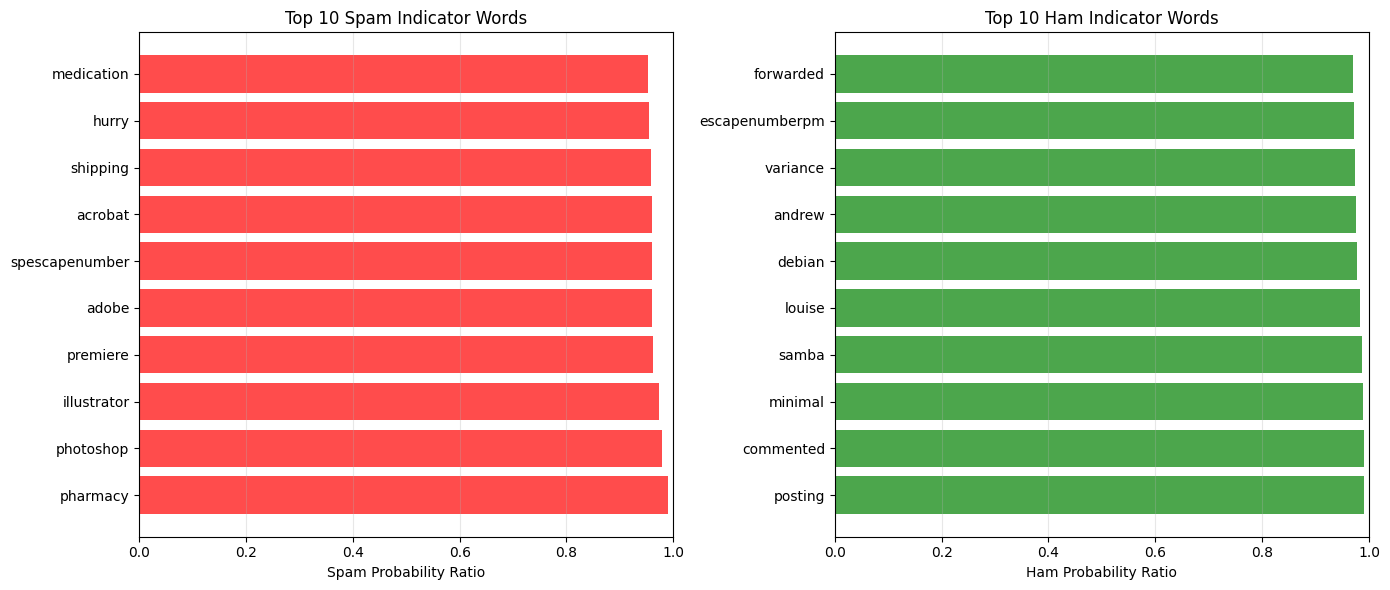

In [ ]:
# Visualize top spam and ham indicator words
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top spam words
top_spam = spam_indicator_words[:10]
words = [w for w, _, _ in top_spam]
ratios = [r for _, r, _ in top_spam]

axes[0].barh(range(len(words)), ratios, color='red', alpha=0.7)
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Spam Probability Ratio')
axes[0].set_title('Top 10 Spam Indicator Words')
axes[0].set_xlim([0, 1])
axes[0].grid(axis='x', alpha=0.3)

# Top ham words
top_ham = ham_indicator_words[:10]
words = [w for w, _, _ in top_ham]
ratios = [1-r for _, r, _ in top_ham]

axes[1].barh(range(len(words)), ratios, color='green', alpha=0.7)
axes[1].set_yticks(range(len(words)))
axes[1].set_yticklabels(words)
axes[1].set_xlabel('Ham Probability Ratio')
axes[1].set_title('Top 10 Ham Indicator Words')
axes[1].set_xlim([0, 1])
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 13

In [ ]:
print("="*60)
print("NAIVE BAYES SPAM CLASSIFIER - FINAL ANALYSIS")
print("="*60)

print(f"\n1. Dataset Statistics:")
print(f"   - Total messages: {len(df)}")
print(f"   - Training messages: {len(train_spam) + len(train_ham)}")
print(f"   - Test messages: {len(test_emails['spam']) + len(test_emails['ham'])}")

print(f"\n2. Vocabulary Analysis:")
print(f"   - Unique words in spam vocabulary: {len(vocab_unique_words_spam)}")
print(f"   - Unique words in ham vocabulary: {len(vocab_unique_words_ham)}")
print(f"   - Total unique words: {len(set(vocab_unique_words_spam + vocab_unique_words_ham))}")

print(f"\n3. Model Performance:")
print(f"   - Spam detection accuracy: {spam_accuracy:.2%}")
print(f"   - Ham detection accuracy: {ham_accuracy:.2%}")
print(f"   - Overall accuracy: {overall_accuracy:.2%}")

print(f"\n4. Key Findings:")
print(f"   - Prior probability P(Spam): {prob_spam:.4f}")
print(f"   - Prior probability P(Ham): {prob_ham:.4f}")
print(f"   - Most indicative spam word: '{spam_indicator_words[0][0]}' with ratio {spam_indicator_words[0][1]:.4f}")
print(f"   - Most indicative ham word: '{ham_indicator_words[0][0]}' with ratio {1-ham_indicator_words[0][1]:.4f}")

NAIVE BAYES SPAM CLASSIFIER - FINAL ANALYSIS

1. Dataset Statistics:
   - Total messages: 6000
   - Training messages: 4800
   - Test messages: 1200

2. Vocabulary Analysis:
   - Unique words in spam vocabulary: 35169
   - Unique words in ham vocabulary: 30373
   - Total unique words: 53581

3. Model Performance:
   - Spam detection accuracy: 88.00%
   - Ham detection accuracy: 89.00%
   - Overall accuracy: 88.50%

4. Key Findings:
   - Prior probability P(Spam): 0.4990
   - Prior probability P(Ham): 0.5010
   - Most indicative spam word: 'pharmacy' with ratio 0.9904
   - Most indicative ham word: 'posting' with ratio 0.9903
